In [1]:
import numpy as np
from random import randint
from time import time as t
from matplotlib import pyplot as plt

**1 - Implemente o Método da Eliminação Gaussiana, Decomposição PtLU, Decomposição de Cholesky e substituição reversa para resolver Ax = b. Escolha 3 sistemas de equação lineares distintos, com 3 equações e 3 incógnitas, onde seja necessário realizar troca de linhas em pelo menos um deles. Resolva os sistemas aplicando cada um dos métodos. Exiba a matriz de permutação P obtida de cada sistema.**

In [2]:
def eliminacaoGaussiana(A, n):
    m = np.zeros(n)
    x = np.zeros(n)

    for i in range(0, n-1):
        for p in range(i, n):
            if A[p,i] != 0:
                break
        if(p == n-1 and A[p,i]==0):
            print('Não há solução única')
            return
        if p!= i:
            A[[i,p]] = A[[p,i]]
        for j in range(i+1,n):
            m[j] = A[j,i]/A[i,i]
            A[j,:] = A[j,:] - m[j]*A[i,:]
        if A[n-1,n-1] == 0:
            print('Não há solução única')
            return

    x[n-1] = A[n-1,n]/A[n-1, n-1]
    for i in range(n-2,-1,-1):
        x[i] = (A[i,n]-np.dot(A[i,i:n],x[i:n])) / A[i,i]
        return x

In [3]:
def PtLU(M, n):
    A = M.copy()
    s = np.zeros((n))
    x = np.zeros((n))
    y = np.zeros((n))
    P = np.zeros((n,n), np.int64)
    permu = np.arange(n)
    I = np.eye(n, dtype=int)
    L = np.zeros((n,n), np.float64)

    for i in range(n):
        s[i] = max(abs(A[i, :n]))
        if s[i] == 0:
            print('sem solução')
            return

    for i in range(n-1):
        a = np.abs(A[i:, i])/s[i:]
        p = np.argmax(a) + i
        if A[p,i] == 0:
            print('sem solução')
            return
        if p != i:
            permu[[p,i]] = permu[[i,p]]
            A[[i, p]] = A[[p, i]]
            L[[i, p]] = L[[p, i]]

        for j in range(i+1, n):
            m = A[j, i]/A[i, i]
            A[j] = A[j] - m * A[i]
            L[j,i] = m
    if A[-1,-1] == 0:
        print('Sem solução')
        return
  
    for i in range(n):
        index = permu.ravel() == i
        P[index, i] = 1
  
    U = A[:, :n]
    L = L+I
    y = A[:, n]

    x[-1] = y[-1] / U[-1,n-1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:n], x[i+1:n])) / U[i,i]
    return x

In [4]:
#Eliminação gaussiana & Decomposição PtLU
M1 = np.array([[1, -1, 2, -6], [2, -2, 3, 10], [1, -3, 1, -4]])
M2 = np.array([[1, 1, 1, 1], [2, 1, -3, 4], [3, 0, -1, 5]])
M3 = np.array([[1, 2, 3.6, 4], [0, 0, 1.4, 2], [1.3, 1, 1, 1]])

print('Matrizes:')
print(M1, '\n\n', M2, '\n\n', M3, '\n\n')
print(f'Eliminação gaussiana:\t {eliminacaoGaussiana(M1, 3)}')
print(f'Decomposição PtLU:\t {PtLU(M1, 3)}\n')
print(f'Eliminação gaussiana:\t {eliminacaoGaussiana(M2, 3)}')
print(f'Decomposição PtLU:\t {PtLU(M2, 3)}\n')
print(f'Eliminação gaussiana:\t {eliminacaoGaussiana(M3, 3)}')
print(f'Decomposição PtLU:\t {PtLU(M3, 3)}')

Matrizes:
[[ 1 -1  2 -6]
 [ 2 -2  3 10]
 [ 1 -3  1 -4]] 

 [[ 1  1  1  1]
 [ 2  1 -3  4]
 [ 3  0 -1  5]] 

 [[1.  2.  3.6 4. ]
 [0.  0.  1.4 2. ]
 [1.3 1.  1.  1. ]] 


Eliminação gaussiana:	 [  0.  10. -22.]
Decomposição PtLU:	 [ 48.  10. -22.]

Eliminação gaussiana:	 [ 0.         -0.18181818 -0.36363636]
Decomposição PtLU:	 [ 1.54545455 -0.18181818 -0.36363636]

Eliminação gaussiana:	 [ 0.         -0.66071429  1.42857143]
Decomposição PtLU:	 [ 0.17857143 -0.66071429  1.42857143]


**2 - Implemente um algoritmo para gerar matrizes positivas definidas aleatórias. Ele deve seguir os seguintes passos:**


**_Entrada_: dimensão n da matriz pos. def. aleatória quadrada An×n**

**_Saída_: matriz pos. def. aleatória quadrada An×n**

In [5]:
# A = rand(n,n);          Gerar uma matriz aleatória qualquer n × n com elementos no intervalo [0, 1]
# A = 0.5 · (A + A^T);    Gerar uma matriz simétrica
# A = A + n · In;         Como A(i, j) < 1, ao somar n · In garantiremos por construção uma matriz simétrica
#                         estritamente diagonal dominante (e consequentemente simétrica positiva definida).

In [6]:
def rand(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = randint(0,1)
    return A

def matrizPositivaDefinida(n):
    A = rand(n)
    A = 0.5 * (A + np.matrix(A).T)
    A += n * np.eye(n)
    return A

print(matrizPositivaDefinida(5))

[[6.  0.5 0.5 0.5 0. ]
 [0.5 6.  0.5 0.  0. ]
 [0.5 0.5 5.  1.  1. ]
 [0.5 0.  1.  6.  0.5]
 [0.  0.  1.  0.5 6. ]]


**3 - Realize o seguinte experimento para comparar a performance dos 3 métodos da questão 1, considerando os valores de n 10, 100, 500, 1.000, 1.500 e 2.000.**

**(a) Para cada valor de n, gere 10 matrizes positivas definidas aleatórias n × n e 10 vetores aleatórios b != 0 com n entradas e resolva os sistemas Ax = b, onde A  ́e cada uma das matrizes geradas, usando os 3 métodos da questão 1. Guarde o tempo de execução total de cada método, para cada n.**

**(b) Para cada valor de n, gere 1 unica matriz positiva definida aleatória n × n e 10 vetores b != 0 aleatórios com n entradas e resolva os sistemas Ax = b usando os 3 métodos da questão 1. Na sua implementação, leve em conta que alguns métodos não precisam recalcular decomposições para valores de A iguais. Guarde o tempo de execução total de cada método, para cada n.**

**(c) Considerando os resultados dos  ́ıtens (a) e (b), compare os tempos de execução plotando uma ́unica figura com os 6 gráficos de tempos de execução em função do tamanho da matriz n, onde o eixo horizontal representa o tamanho n da matriz e o eixo vertical o tempo de execução. Cada gráfico deve ser exibido como uma curva poligonal. Qual método funciona melhor na letra a) ? E na letra b) ?**

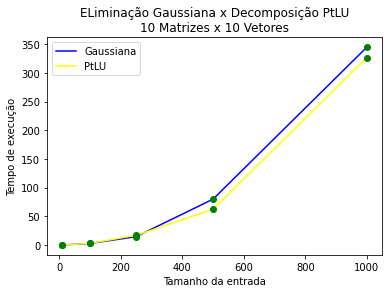

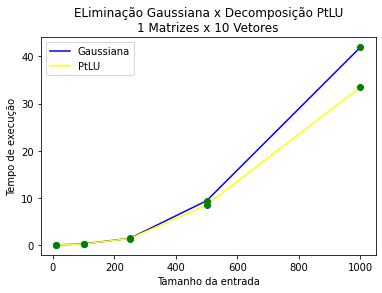

In [7]:
def matrizPositivaDefinida(n):
    A = np.random.rand(n,n)
    A = 0.5 * (A + A.T)
    A += n * np.eye(n)
    return A

def vetorAleatorio(n):
    v = np.array(np.array_split(np.random.rand(n), n))
    return v

def comparacao(qtd_matriz, qtd_vetor):
    A = []
    B = []
    temposGaussiana = []
    temposPtLU = []
    # Ignorando n > 1000 (muito custoso)
    tamanhos = [10, 100, 250, 500, 1000]
  
    for i in tamanhos:
        for j in range(qtd_matriz):
            A.append(matrizPositivaDefinida(i))
            for k in range(qtd_vetor):
                B.append(vetorAleatorio(i))

    for k, tam in enumerate(tamanhos):

        # Eliminação Gaussiana
        ti = t()
        for i in range(k * qtd_matriz, qtd_matriz * (k+1)):
            x0 = np.zeros(A[i].shape[0])
            for j in range(i * qtd_vetor, qtd_vetor * (i+1)):
                eliminacaoGaussiana(np.append(A[i], B[j], axis=1), tam)
        temposGaussiana.append(t() - ti)

        # Decomposição PtLU
        ti = t()
        for i in range(k * qtd_matriz, qtd_matriz * (k+1)):
            x0 = np.zeros(A[i].shape[0])
            for j in range(i * qtd_vetor, qtd_vetor * (i+1)):
                PtLU(np.append(A[i], B[j], axis=1), tam)
        temposPtLU.append(t() - ti)

    plt.plot(tamanhos, temposGaussiana, c = 'blue')
    plt.plot(tamanhos, temposPtLU, c = 'yellow')
    plt.plot(tamanhos, temposGaussiana, 'go')
    plt.plot(tamanhos, temposPtLU, 'go')
    plt.title(f'ELiminação Gaussiana x Decomposição PtLU\n{qtd_matriz} Matrizes x {qtd_vetor} Vetores')
    plt.ylabel('Tempo de execução')
    plt.xlabel('Tamanho da entrada')
    plt.legend(['Gaussiana', 'PtLU'])
    plt.show()

comparacao(10, 10)
print('\n')
comparacao(1, 10)

O método PtLU tem melhor desempenho nos dois casos.